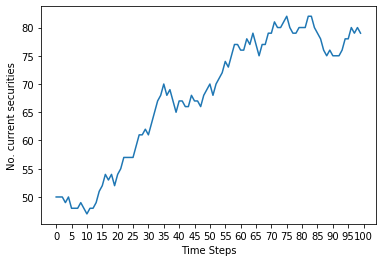

In [12]:
import matplotlib.pyplot as plt

import random
import math
import numpy as np

steps = 100
graph_interval = steps / 20
X0 = 50
S0 = 100

# initialize securities number and price for each step
X = [X0] * steps
S = [S0] * steps

# traders list
traders = []

# create traders class
class RandomTrader:
    def __init__(self, stock):
        self.X = stock.copy()
    
    def random_trade(self):
        return np.random.randint(-2, 3)

    def trade(self, num_steps):
        for i in range(1, num_steps):
            self.X[i] = self.X[i - 1] + self.random_trade()
            
    def show_stock(self):
        return self.X
    
class TrendFollower:
    def __init__(self, stock):
        self.X = stock.copy()
    
    def trend_following_trade(self, S, current_step):
        if current_step <= 1:
            return 0
        if S[current_step - 1] > S[current_step - 2]:
            return np.random.randint(1, 3)
        else:
            return 0

    def trade(self, S, num_steps):
        for i in range(1, num_steps):
            self.X[i] = self.X[i - 1] + self.trend_following_trade(S, i)
            
    def show_stock(self):
        return self.X
    
class MeanAversion:
    def __init__(self, stock):
        self.X = stock
        
    def mean_aversion_trade(self, S, current_step):
        if current_step <= 2:
            return 0
        mean = sum(S[current_step - 3:current_step])/3
        if S[current_step] > mean:
            return np.random.randint(-2, 0)
        elif S[current_step] < mean:
            return np.random.randint(1, 3)
        else:
            return 0
        
    def trade(self, S, num_steps):
        for i in range(1, num_steps):
            self.X[i] = self.X[i - 1] + self.mean_aversion_trade(S, i)
            
    def show_stock(self):
        return self.X    

# add a random trader
trader_1 = RandomTrader(X)
trader_1.trade(steps)
X1 = trader_1.show_stock()
traders.append(trader_1)

# random jump from step to step, ranging from selling 2 units to buying to units
# def random_trader():
#     return np.random.randint(-2, 3)

# def random_transact(x, trade_transactions):
#     for i in range(1, trade_transactions):
#         x[i] = x[i - 1] + random_trader()
        
# random_transact(X, steps)

plt.plot(X1)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('No. current securities')
plt.show()

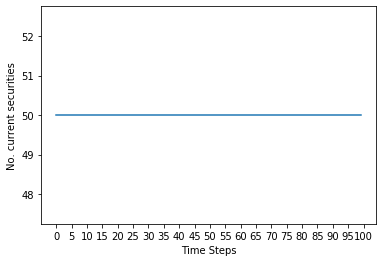

In [13]:
plt.plot(X)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('No. current securities')
plt.show()

In [14]:
## independent random variable in volativity
xi = np.insert(np.random.normal(0, 1.0, steps - 1), 0, 0.0)

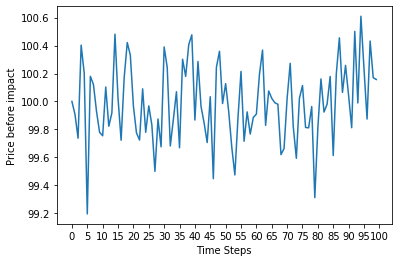

In [15]:
## price dynamics
# volativity factors
def volativity_factor(volativity, xi):
    return volativity * xi

volativity = 0.3

S =[S[i] + volativity_factor(volativity, xi[i]) for i in range(steps)]


plt.plot(S)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('Price before impact')
plt.show()

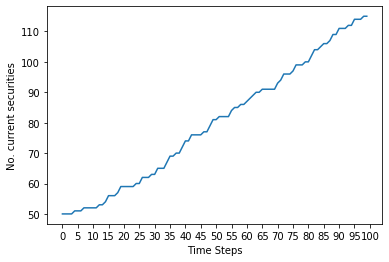

In [16]:
# add a trend follower
trader_2 = TrendFollower(X)
trader_2.trade(S, steps)
X2 = trader_2.show_stock()
traders.append(trader_2)

plt.plot(X2)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('No. current securities')
plt.show()

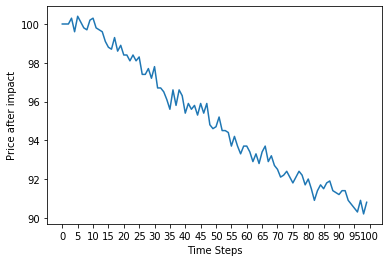

In [17]:
# impact
def permanent_impact(n, gamma):
    return gamma * n

def temporary_impact(n, epsilon, eta):
    return epsilon * np.sign(n) + eta * n

# def expected_impact(n, gamma, espsilon, eta):
#     return permanent_impact(n, gamma) + temporary_impact(n, epsilon, eta)

gamma = 0.1
epsilon = 0.1
eta = 0.1

# market price with a random trader and a trend follower
S_temp = S.copy()

n = np.zeros(np.shape(X))[1:]
for trader in traders:
    n += -np.diff(trader.show_stock())

n = np.insert(n, 0, 0)
for i in range(1, steps):
    S_temp[i] = S_temp[i - 1] + permanent_impact(n[i], gamma)
    
S_til_temp = [S_temp[i] + temporary_impact(n[i], epsilon, eta) for i in range(steps)]

plt.plot(S_til_temp)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('Price after impact')
plt.show()

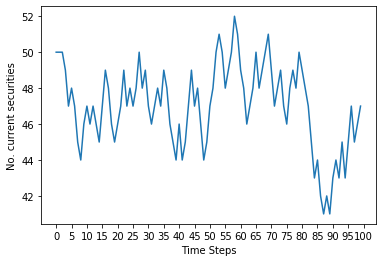

In [20]:
trader_3 = MeanAversion(X)
trader_3.trade(S, steps)
X3 = trader_3.show_stock()
traders.append(trader_3)

plt.plot(X3)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('No. current securities')
plt.show()

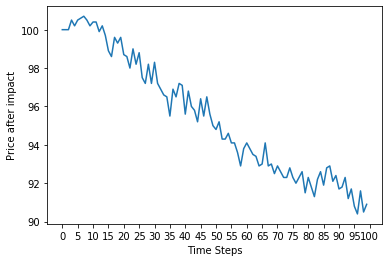

In [22]:
# market price after adding mean aversion
n = np.zeros(np.shape(X))[1:]
for trader in traders:
    n += -np.diff(trader.show_stock())

n = np.insert(n, 0, 0)
for i in range(1, steps):
    S[i] = S[i - 1] + permanent_impact(n[i], gamma)
    
S_til = [S[i] + temporary_impact(n[i], epsilon, eta) for i in range(steps)]

plt.plot(S_til)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('Price after impact')
plt.show()

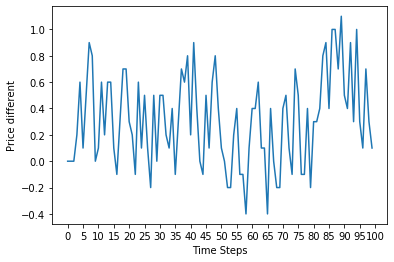

In [23]:
S_different = [x - y for x, y in zip(S_til, S_til_temp)]

plt.plot(S_different)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('Price different')
plt.show()